## Resize Image
고해상도의 이미지는 사람의 눈으로 보기에는 좋아 보이지만 컴퓨터가 연산하거나 이미지 파이프라인 처리에는 좋지 않을 수 있습니다.  
이미지가 큰 경우 더 많은 데이터가 필요하기 때문에 알고리즘이 데이터를 처리하는 데 오래 걸립니다. 이런 고해상도 이미지는 매우 디테일하지만, 컴퓨터 비전/이미지 처리 관점에서 볼 때 이러한 디테일한 사항보다는 이미지의 구조적 구성 요소가 더 중요하기 때문에 고해상도의 이미지를 다운샘플링하여 더 빠르고 정확하게 실행될 수 있도록 합니다.

In [37]:
import cv2
import imutils
import matplotlib.pyplot as plt

In [13]:
def img_show(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()
        
        
def print_image_info(image):
    print('이미지 사이즈 : {}'.format(image.shape))
    print('이미지 dtype : {}'.format(image.dtype))
    print('이미지 Height : {}'.format(image.shape[0]))
    print('이미지 Width : {}'.format(image.shape[1]))
    print('이미지 전체 픽셀 개수 : {}'.format(image.size))

### Load Image

이미지 사이즈 : (1028, 1024, 3)
이미지 dtype : uint8
이미지 Height : 1028
이미지 Width : 1024
이미지 전체 픽셀 개수 : 3158016


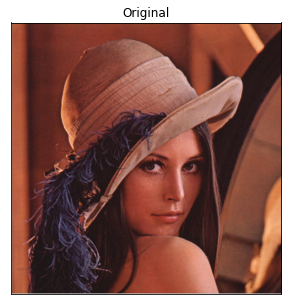

In [14]:
cv2_image = cv2.imread('asset/images/test_image.jpg', cv2.IMREAD_COLOR)
print_image_info(cv2_image)
img_show(["Original"], [cv2_image])

### OpenCV를 이용한 Resize
```cv2.resize```를 이용하며 종횡비를 계산하여 왜곡되지 않도록 합니다.  
이미지를 입력값 픽셀로 조정합니다. 이미지 왜곡을 방지하기 위해 종횡비(aspect_ratio)를 계산하고 종횡비를 활용하여 이미지의 크기 (width, height)를 다시 계산합니다. 

```width```를 이용한 이미지 조정

이미지 사이즈 : (200, 200, 3)
이미지 dtype : uint8
이미지 Height : 200
이미지 Width : 200
이미지 전체 픽셀 개수 : 120000


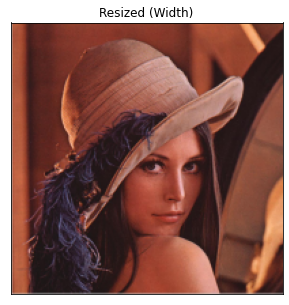

In [38]:
width = 200

aspect_ratio = float(width) / cv2_image.shape[1]
dsize = (width, int(cv2_image.shape[0] * aspect_ratio))

resized = cv2.resize(cv2_image, dsize, interpolation=cv2.INTER_AREA)
print_image_info(resized)
img_show("Resized (Width)", resized)

```height```를 이용한 이미지 조정

이미지 사이즈 : (100, 99, 3)
이미지 dtype : uint8
이미지 Height : 100
이미지 Width : 99
이미지 전체 픽셀 개수 : 29700


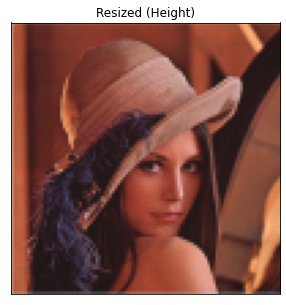

In [34]:
height = 100

aspect_ratio = float(height) / cv2_image.shape[0]
dsize = (int(cv2_image.shape[1] * aspect_ratio), height)

resized = cv2.resize(cv2_image, dsize, interpolation=cv2.INTER_AREA)
print_image_info(resized)
img_show("Resized (Height)", resized)

### imutils를 이용한 Resize
```cv2.resize```를 사용하면 종횡비를 계산하기 위한 연산이 필요합니다. ```imutils.resize```를 이용하면 자동으로 가로, 세로 비율을 계산하고 유지 할 수 있습니다.

이미지 사이즈 : (100, 100, 3)
이미지 dtype : uint8
이미지 Height : 100
이미지 Width : 100
이미지 전체 픽셀 개수 : 30000


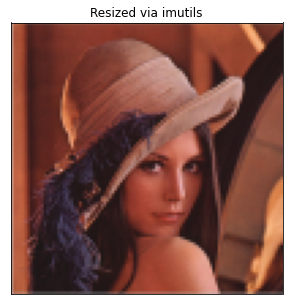

In [35]:
resized = imutils.resize(cv2_image, width=100)
print_image_info(resized)
img_show("Resized via imutils", resized)

이미지를 늘리거나 줄이는 경우 보간 방법을 활용합니다. 이미지의 픽셀과 이웃하고 있는 픽셀을 가져와 이미지 크기를 늘리거나 줄이는데 사용하는데 이때 사용되는 방법이 보간 함수입니다.  
이미지를 줄이는 것은 늘리는 것에 비해 상대적으로 쉽습니다.  
단순히 이미지에서 픽셀을 제거하면 되기 때문입니다. 반면 이미지의 크기를 늘리는 경우 이전에 존재하지 않았던 픽셀 사이의 공간을 채워야 합니다.

이미지 크기를 조정할 때에는 어떤 보간 방법을 사용해야 할 지 선택해야 합니다.  
```cv2.INTER_NEAREST```의 경우는 매우 빠르지만 최고의 품질을 제공하지는 않습니다. 따라서 Resource가 제한적인 환경에서 사용해야 합니다.
```cv2.INTER_LINEAR```의 경우는 이미지 크기를 늘리는 경우(업샘플링) 사용하면 좋습니다. ```cv2.INTER_CUBIC```는 ```cv2.INTER_LINEAR```보다 빠르지만 ```cv2.INTER_LINEAR```가 결과가 더 좋습니다.  
이미지 크기를 줄이는 경우(다운샘플링) OpenCV 설명서에서는 ```cv2.INTER_AREA```,  ```cv2.INTER_NEAREST```를 이용하라고 설명하고 있습니다. 하지만 일반적으로 ```cv2.INTER_AREA```가 더 만족스러운 결과를 얻을 수 있습니다. 마지막으로, 일반적으로 ```cv2.INTER_LINEAR``` 보간 방법은 업샘플링 또는 다운샘플링을 할 때 기본값으로 권장됩니다. 이는 적당한 계산 비용으로 최고 품질의 결과를 제공하기 때문입니다.

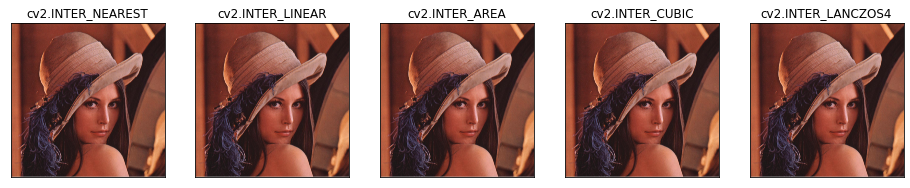

In [36]:
methods = [("cv2.INTER_NEAREST", cv2.INTER_NEAREST),
           ("cv2.INTER_LINEAR", cv2.INTER_LINEAR),
           ("cv2.INTER_AREA", cv2.INTER_AREA),
           ("cv2.INTER_CUBIC", cv2.INTER_CUBIC),
           ("cv2.INTER_LANCZOS4", cv2.INTER_LANCZOS4)]

image_label = []
image_list = []

for (name, method) in methods:
    image_label.append(name)
    resized = imutils.resize(cv2_image, width=cv2_image.shape[1] * 3, inter=method)
    image_list.append(resized)
    
img_show(image_label, image_list, figsize=(16, 10))